In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test=pd.read_csv('..../test.csv')
df_train=pd.read_csv('.../train.csv')
df_test_final=df_test.copy()

# TRAIN DATASET

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
print(df_train.Pclass.value_counts(dropna=False))
print("--"*50)
print(df_train.Embarked.value_counts(dropna=False))
print("--"*50)
print(df_train.SibSp.value_counts(dropna=False))
print("--"*50)
print(df_train.Parch.value_counts(dropna=False))
print("--"*50)

3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
----------------------------------------------------------------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
----------------------------------------------------------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------------------------------


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:>

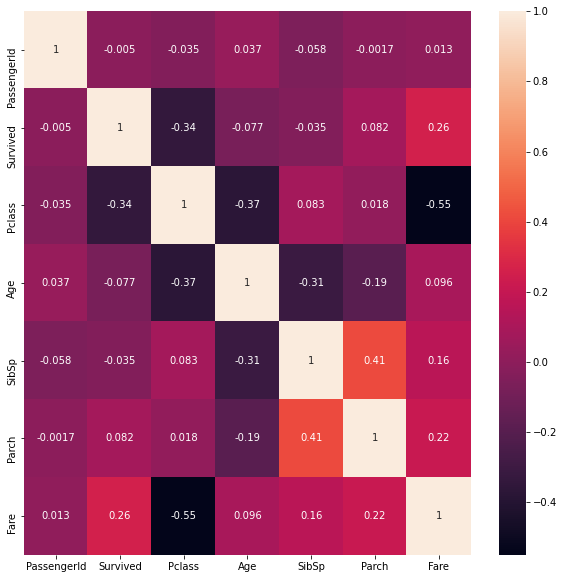

In [9]:
import seaborn as sns
map_describe=df_train.corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(map_describe,annot = True)

In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [12]:
print(df_test.Pclass.value_counts(dropna=False))  
print("--"*50)
print(df_test.Embarked.value_counts())
print("--"*50)
print(df_test.SibSp.value_counts())
print("--"*50)
print(df_test.Parch.value_counts())
print("--"*50)

3    218
1    107
2     93
Name: Pclass, dtype: int64
----------------------------------------------------------------------------------------------------
S    270
C    102
Q     46
Name: Embarked, dtype: int64
----------------------------------------------------------------------------------------------------
0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64
----------------------------------------------------------------------------------------------------
0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64
----------------------------------------------------------------------------------------------------


# cleaning data .... 

In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
del df_train["Cabin"] 
df_train["Age"].fillna(df_train.Age.mean(),inplace=True)
df_train['Embarked'] = df_train['Embarked'].fillna('Q')


In [15]:
df_train.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [16]:
del df_test["Cabin"]
df_test["Age"].fillna(df_test.Age.mean(),inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [17]:
df_test["Fare"].fillna(df_test.Fare.mean(),inplace=True)

In [18]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# feacturing engineering

In [19]:
Y=df_train["Survived"]

In [20]:
del df_train["PassengerId"]
del df_test["PassengerId"]

In [21]:
del df_train["Survived"]

In [22]:
print(df_train.columns)
print("--"*12)
print(df_test.columns)
print("--"*12)

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')
------------------------
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')
------------------------


# JOIN DATA

In [23]:
data=pd.concat([df_train,df_test],axis =0)  
data.shape

(1309, 9)

In [24]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
def _One_Hot_Encoding(columns):
    data_test=data
    ii=0
    for i in columns:
        col1=pd.get_dummies(data[i],drop_first=True)
        data.drop([i],axis=1,inplace=True)
        if ii!=0:
            data_test=pd.concat([data_test,col1],axis=1)
        else:
            data_test=col1.copy()
        ii+=1
    data_test=pd.concat([data,data_test],axis=1)
    return data_test
    

In [26]:
df_data=_One_Hot_Encoding(["Sex","Embarked","Pclass","Parch"])

# Our final data

In [27]:
df_data.head(2)

,Name,Age,SibSp,Ticket,Fare,male,Q,S,2,3,1,2,3,4,5,6,9
0,"Braund, Mr. Owen Harris",22.0,1,A/5 21171,7.2500,1,0,1,0,1,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,PC 17599,71.2833,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df_data.drop("Name",axis=1,inplace=True)
df_data.drop("Ticket",axis=1,inplace=True)

#  Preprocessing our Data

In [29]:
print(df_data.columns)

Index(['Age', 'SibSp', 'Fare', 'male', 'Q', 'S', 2, 3, 1, 2, 3, 4, 5, 6, 9], dtype='object')


In [30]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [31]:
names = df_data.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_data)
df_final = pd.DataFrame(scaled_df, columns=names)

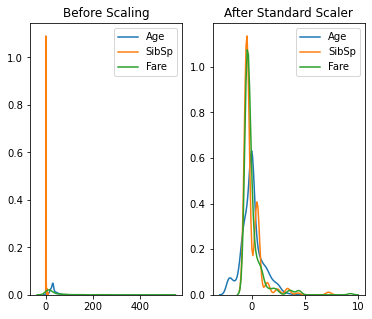

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df_data['Age'], ax=ax1)
sns.kdeplot(df_data['SibSp'], ax=ax1)
sns.kdeplot(df_data['Fare'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(df_final['Age'], ax=ax2)
sns.kdeplot(df_final['SibSp'], ax=ax2)
sns.kdeplot(df_final['Fare'], ax=ax2)
plt.show()

In [33]:
df_final.head(3)

,Age,SibSp,Fare,male,Q,S,2,3,1,2,3,4,5,6,9
0,-0.612031,0.481288,-0.503629,0.743497,-0.324922,0.657394,-0.518084,0.919925,-0.386334,-0.307379,-0.078416,-0.067858,-0.067858,-0.039118,-0.039118
1,0.630318,0.481288,0.734468,-1.344995,-0.324922,-1.521159,-0.518084,-1.087045,-0.386334,-0.307379,-0.078416,-0.067858,-0.067858,-0.039118,-0.039118
2,-0.301444,-0.479087,-0.490578,-1.344995,-0.324922,0.657394,-0.518084,0.919925,-0.386334,-0.307379,-0.078416,-0.067858,-0.067858,-0.039118,-0.039118


# slipt data 

In [34]:
print(Y.shape)

(891,)


In [35]:
df_final.shape

(1309, 15)

In [36]:
df_train=df_final.iloc[:891,:]   
df_test=df_final.iloc[891:,:]

In [37]:
df_train.shape

(891, 15)

In [38]:
df_test.shape

(418, 15)

In [39]:
X=df_train

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [42]:
Models=[RandomForestClassifier(),AdaBoostClassifier(random_state=0), LogisticRegression(random_state=0)]

In [43]:
import joblib

In [44]:
def _training_models(Models):
    ii=0
    for i in Models:
        i.fit(X_train,Y_train)
        Score_model_train=i.score(X_train,Y_train)
        Score_model_test=i.score(X_test,Y_test)
        joblib.dump(i,str(ii)+"model.sav")
        ii+=1
        print("R-Squared Value for Training Set: {:.3f}".format(Score_model_train))
        print("R-Squared Value for Test Set: {:.3f}".format(Score_model_test))
        print("-----"*50)

In [45]:
_training_models(Models)

R-Squared Value for Training Set: 0.987
R-Squared Value for Test Set: 0.844
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R-Squared Value for Training Set: 0.836
R-Squared Value for Test Set: 0.832
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
R-Squared Value for Training Set: 0.803
R-Squared Value for Test Set: 0.788
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
